In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
import datetime
import missingno
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
data = pd.read_csv(r'C:\Users\patri\Downloads\hotel_bookings.csv\hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
data.shape

(119390, 32)

In [10]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<AxesSubplot:>

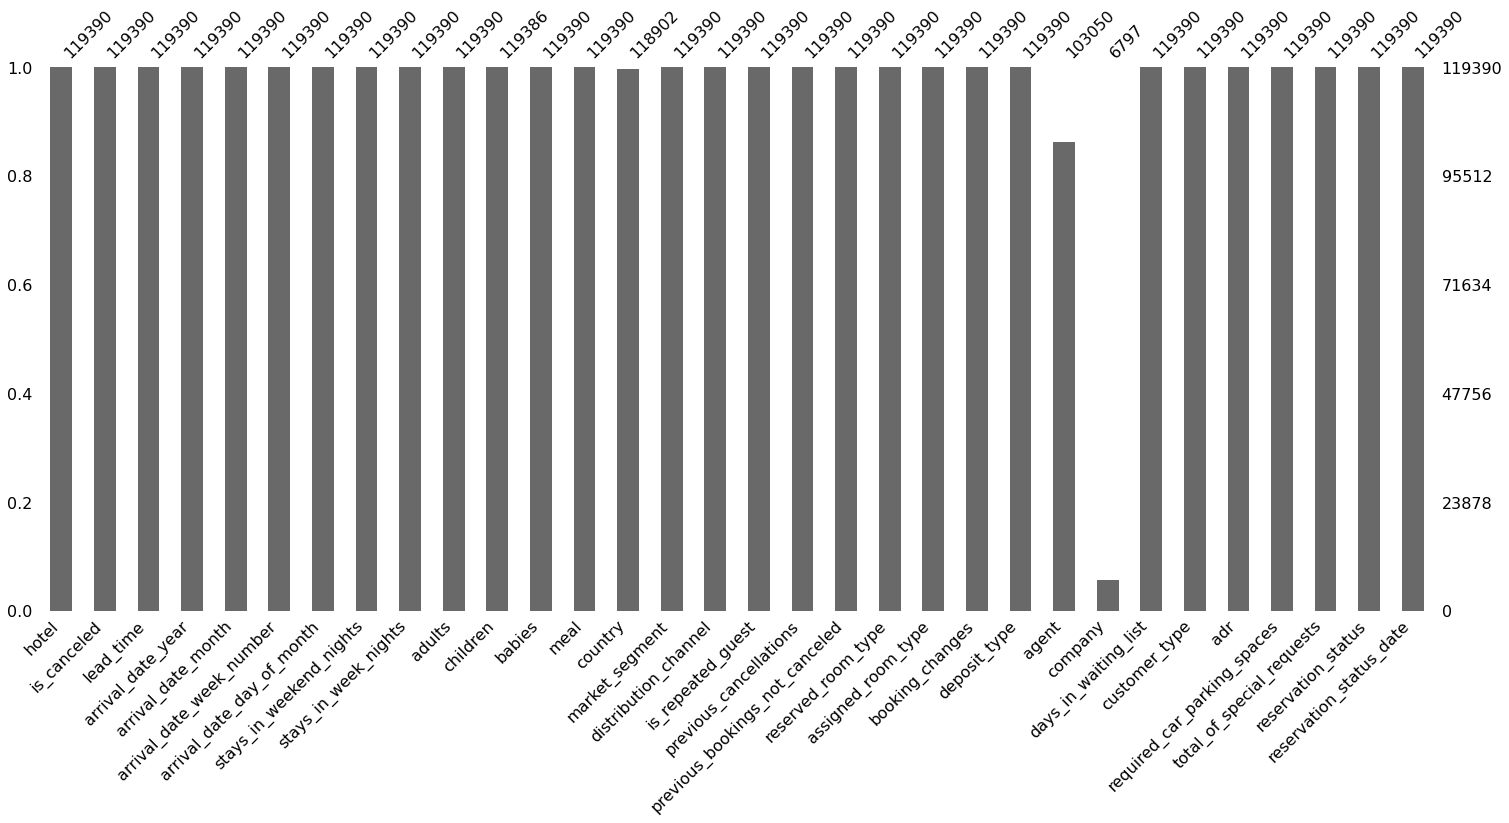

In [13]:
missingno.bar(data)

#visualize missing data

In [14]:
data.drop('company',axis=1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


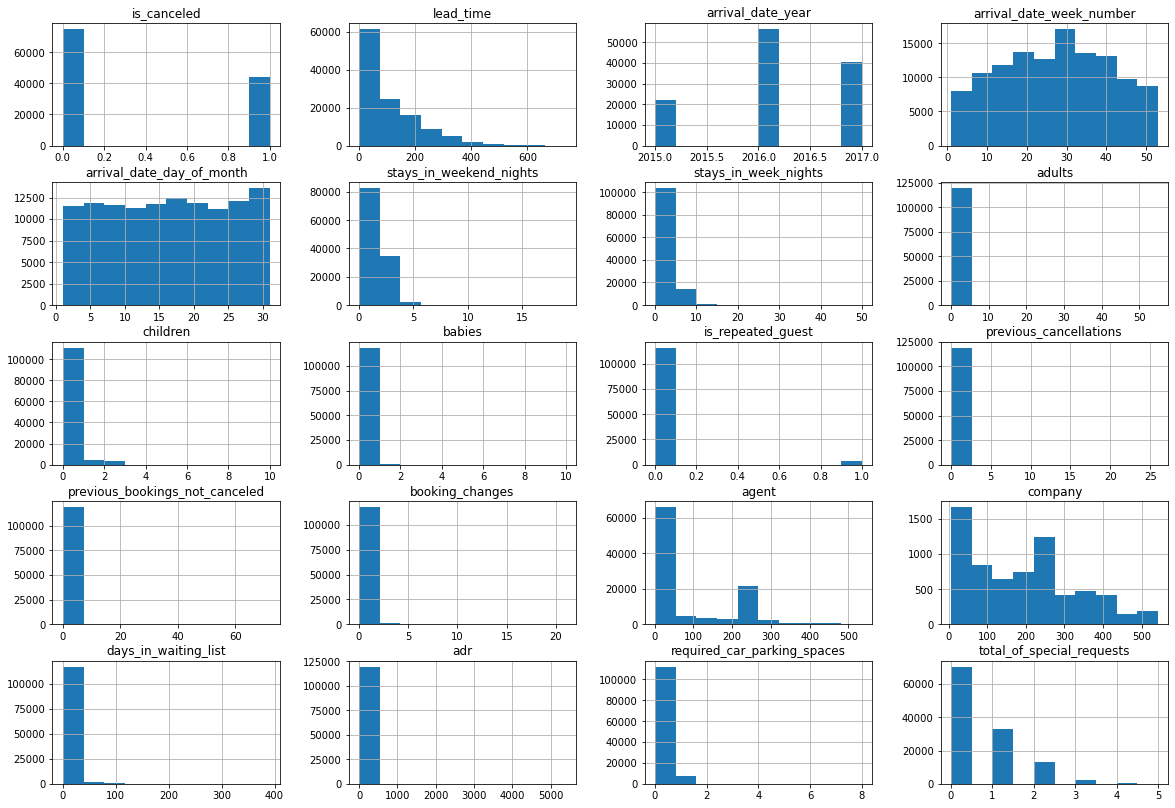

In [15]:
data.hist(figsize=(20,14))
plt.show()

#distribution of numerical data

<AxesSubplot:xlabel='children', ylabel='company'>

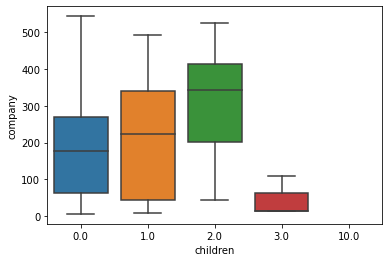

In [16]:
sns.boxplot(x='children',y='company',data=data)



<AxesSubplot:xlabel='company', ylabel='hotel'>

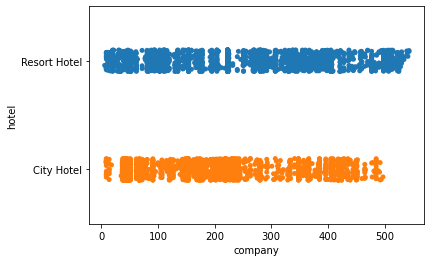

In [17]:
sns.stripplot(x='company',y='hotel',data=data)

#A strip plot is a graphical data anlysis technique for summarizing a univariate data set.
#The strip plot is an alternative to a histogram or a density plot.

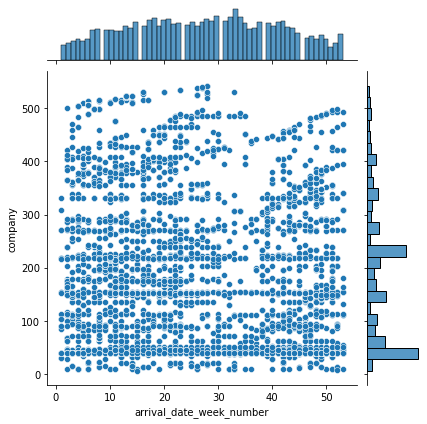

In [18]:
sns.jointplot(x='arrival_date_week_number', y= 'company', data=data)

#Seaborn's jointplot displays a relationship between 2 variables

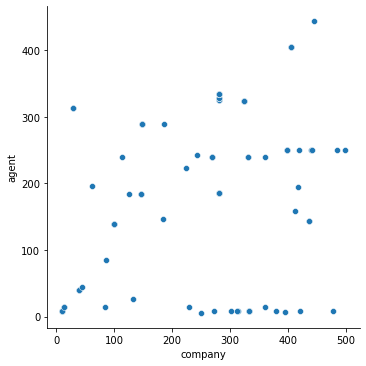

In [19]:
sns.relplot(x='company',y='agent',data=data)

# visualizing statistical relationships using two common approaches: scatter plots and line plots.

<AxesSubplot:xlabel='company', ylabel='agent'>

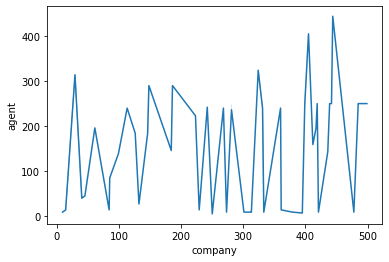

In [20]:
sns.lineplot(x='company',y='agent',data=data)

<AxesSubplot:xlabel='company', ylabel='agent'>

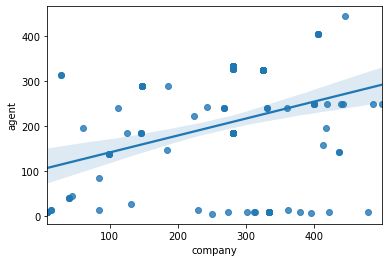

In [21]:
sns.regplot(x='company',y='agent',data=data)

#This method is used to plot data and a linear regression model fit

<AxesSubplot:xlabel='company', ylabel='agent'>

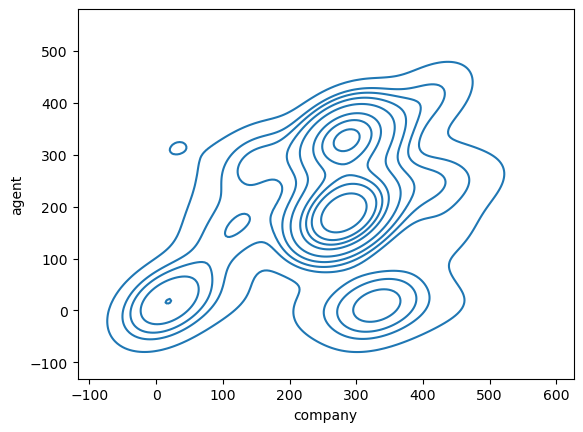

In [22]:
plt.style.use("default")
sns.kdeplot(x='company',y='agent',data=data)

#KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable

<AxesSubplot:xlabel='company', ylabel='hotel'>

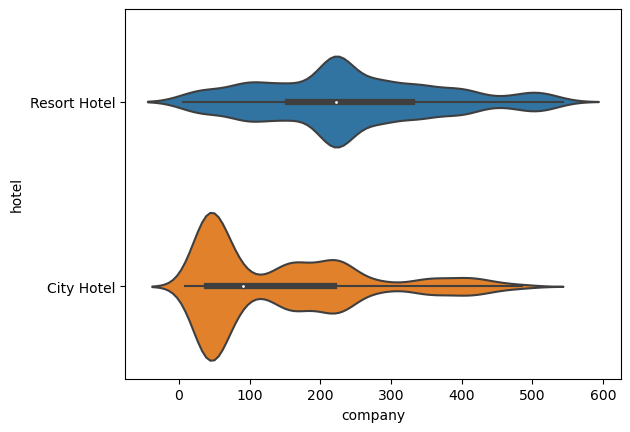

In [23]:
sns.violinplot(x='company',y='hotel',data=data)

#While a box plot only shows summary statistics such as mean/median and interquartile ranges, 
#the violin plot shows the full distribution of the data. 

In [24]:
data=data.drop(['country','agent','company'],axis=1)

In [25]:
data=data.dropna()

#drop null values

In [26]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [27]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [28]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [29]:
data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [30]:
#find the categorialfeatures (cols)

list_1=list(data.columns)

In [31]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [34]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,123


In [35]:
y=data['hotel']
x=data.drop('hotel',axis=1)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [37]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

95508
23878
95508
23878


In [38]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)   

LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
y_pred_reg=reg.predict(x_test)
acc_reg = accuracy_score(y_test, y_pred_reg)
print("Classification Report is:\n",classification_report(y_test,y_pred_reg))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_reg))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83     15891
           1       0.70      0.46      0.55      7987

    accuracy                           0.75     23878
   macro avg       0.73      0.68      0.69     23878
weighted avg       0.74      0.75      0.74     23878

Confusion Matrix:
 [[14319  1572]
 [ 4348  3639]]
Training Score:
 75.47325878460444
Accuracy Score of Logistic Regression is : 0.7520730379428763


In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8818996565876539
Confusion Matrix : 
[[14897   994]
 [ 1826  6161]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     15891
           1       0.86      0.77      0.81      7987

    accuracy                           0.88     23878
   macro avg       0.88      0.85      0.86     23878
weighted avg       0.88      0.88      0.88     23878



In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [42]:
y_pred=dtree.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[14919   972]
 [ 2448  5539]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15891
           1       0.85      0.69      0.76      7987

    accuracy                           0.86     23878
   macro avg       0.85      0.82      0.83     23878
weighted avg       0.86      0.86      0.85     23878



0.8567719239467292

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
y_pred=rfc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[15573   318]
 [  508  7479]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15891
           1       0.96      0.94      0.95      7987

    accuracy                           0.97     23878
   macro avg       0.96      0.96      0.96     23878
weighted avg       0.97      0.97      0.97     23878



0.965407488064327

In [45]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [46]:
y_pred=adb.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[14867  1024]
 [ 2121  5866]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.90     15891
           1       0.85      0.73      0.79      7987

    accuracy                           0.87     23878
   macro avg       0.86      0.84      0.85     23878
weighted avg       0.87      0.87      0.87     23878



0.868288801407153

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [48]:
y_pred=gbc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[15217   674]
 [ 1601  6386]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     15891
           1       0.90      0.80      0.85      7987

    accuracy                           0.90     23878
   macro avg       0.90      0.88      0.89     23878
weighted avg       0.90      0.90      0.90     23878



0.9047240137364938

In [49]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

[14:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=12, num_parallel_tree=1,
              objective='reg:linear', predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred=xgb.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[15318   573]
 [ 3055  4932]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     15891
           1       0.90      0.62      0.73      7987

    accuracy                           0.85     23878
   macro avg       0.86      0.79      0.81     23878
weighted avg       0.85      0.85      0.84     23878



0.8480609766312086

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(random_state=0)

In [52]:
y_pred=etc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[15526   365]
 [  542  7445]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15891
           1       0.95      0.93      0.94      7987

    accuracy                           0.96     23878
   macro avg       0.96      0.95      0.96     23878
weighted avg       0.96      0.96      0.96     23878



0.9620152441578022

In [53]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
117018,0,0
107541,0,0
56907,0,0
26114,1,1
42024,0,0
...,...,...
55160,0,0
78598,0,0
98604,0,0
64854,0,0
